# PREDICTING A PULSAR STAR
Dr Robert Lyon
HTRU2 is a data set which describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey . 
Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter . 
As pulsars rotate, their emission beam sweeps across the sky, and when this crosses our line of sight, produces a detectable pattern of broadband radio emission. As pulsars rotate rapidly, this pattern repeats periodically. Thus pulsar search involves looking for periodic radio signals with large radio telescopes. 
Each pulsar produces a slightly different emission pattern, which varies slightly with each rotation . Thus a potential signal detection known as a 'candidate', is averaged over many rotations of the pulsar, as determined by the length of an observation. In the absence of additional info, each candidate could potentially describe a real pulsar. However in practice almost all detections are caused by radio frequency interference (RFI) and noise, making legitimate signals hard to find. 
Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted, which treat the candidate data sets as binary classification problems. Here the legitimate pulsar examples are a minority positive class, and spurious examples the majority negative class.
The data set shared here contains 16,259 spurious examples caused by RFI/noise, and 1,639 real pulsar examples. These examples have all been checked by human annotators. 

In [2]:
import numpy as np #linear Algbra
import pandas as pd #Dataprocessing

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv("pulsar_stars.csv")


In [6]:
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [8]:
data.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 Mean of the integrated profile                  17898 non-null float64
 Standard deviation of the integrated profile    17898 non-null float64
 Excess kurtosis of the integrated profile       17898 non-null float64
 Skewness of the integrated profile              17898 non-null float64
 Mean of the DM-SNR curve                        17898 non-null float64
 Standard deviation of the DM-SNR curve          17898 non-null float64
 Excess kurtosis of the DM-SNR curve             17898 non-null float64
 Skewness of the DM-SNR curve                    17898 non-null float64
target_class                                     17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


**We've 9 features and looks like there are no non values. However features names are a little bit untidy. I will change them**

In [12]:
data = data.rename(columns={' Mean of the integrated profile':"mean_integrated_profile",
       ' Standard deviation of the integrated profile':"std_deviation_integrated_profile",
       ' Excess kurtosis of the integrated profile':"kurtosis_integrated_profile",
       ' Skewness of the integrated profile':"skewness_integrated_profile", 
        ' Mean of the DM-SNR curve':"mean_dm_snr_curve",
       ' Standardeviation of the DM-SNR curve':"std_deviation_dm_snr_curve",
       ' Excess kurtosis of the DM-SNR curve':"kurtosis_dm_snr_curve",
       ' Skewness of the DM-SNR curve':"skewness_dm_snr_curve",
                           })

**Now Let's look at the 5 entries at the top of the data set**

In [14]:
data.head(5)

,mean_integrated_profile,std_deviation_integrated_profile,kurtosis_integrated_profile,skewness_integrated_profile,mean_dm_snr_curve,Standard deviation of the DM-SNR curve,kurtosis_dm_snr_curve,skewness_dm_snr_curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [16]:
data.corr()

,mean_integrated_profile,std_deviation_integrated_profile,kurtosis_integrated_profile,skewness_integrated_profile,mean_dm_snr_curve,Standard deviation of the DM-SNR curve,kurtosis_dm_snr_curve,skewness_dm_snr_curve,target_class
mean_integrated_profile,1.000000,0.547137,-0.873898,-0.738775,-0.298841,-0.307016,0.234331,0.144033,-0.673181
std_deviation_integrated_profile,0.547137,1.000000,-0.521435,-0.539793,0.006869,-0.047632,0.029429,0.027691,-0.363708
kurtosis_integrated_profile,-0.873898,-0.521435,1.000000,0.945729,0.414368,0.432880,-0.341209,-0.214491,0.791591
skewness_integrated_profile,-0.738775,-0.539793,0.945729,1.000000,0.412056,0.415140,-0.328843,-0.204782,0.709528
mean_dm_snr_curve,-0.298841,0.006869,0.414368,0.412056,1.000000,0.796555,-0.615971,-0.354269,0.400876
Standard deviation of the DM-SNR curve,-0.307016,-0.047632,0.432880,0.415140,0.796555,1.000000,-0.809786,-0.575800,0.491535
kurtosis_dm_snr_curve,0.234331,0.029429,-0.341209,-0.328843,-0.615971,-0.809786,1.000000,0.923743,-0.390816
skewness_dm_snr_curve,0.144033,0.027691,-0.214491,-0.204782,-0.354269,-0.575800,0.923743,1.000000,-0.259117
target_class,-0.673181,-0.363708,0.791591,0.709528,0.400876,0.491535,-0.390816,-0.259117,1.000000


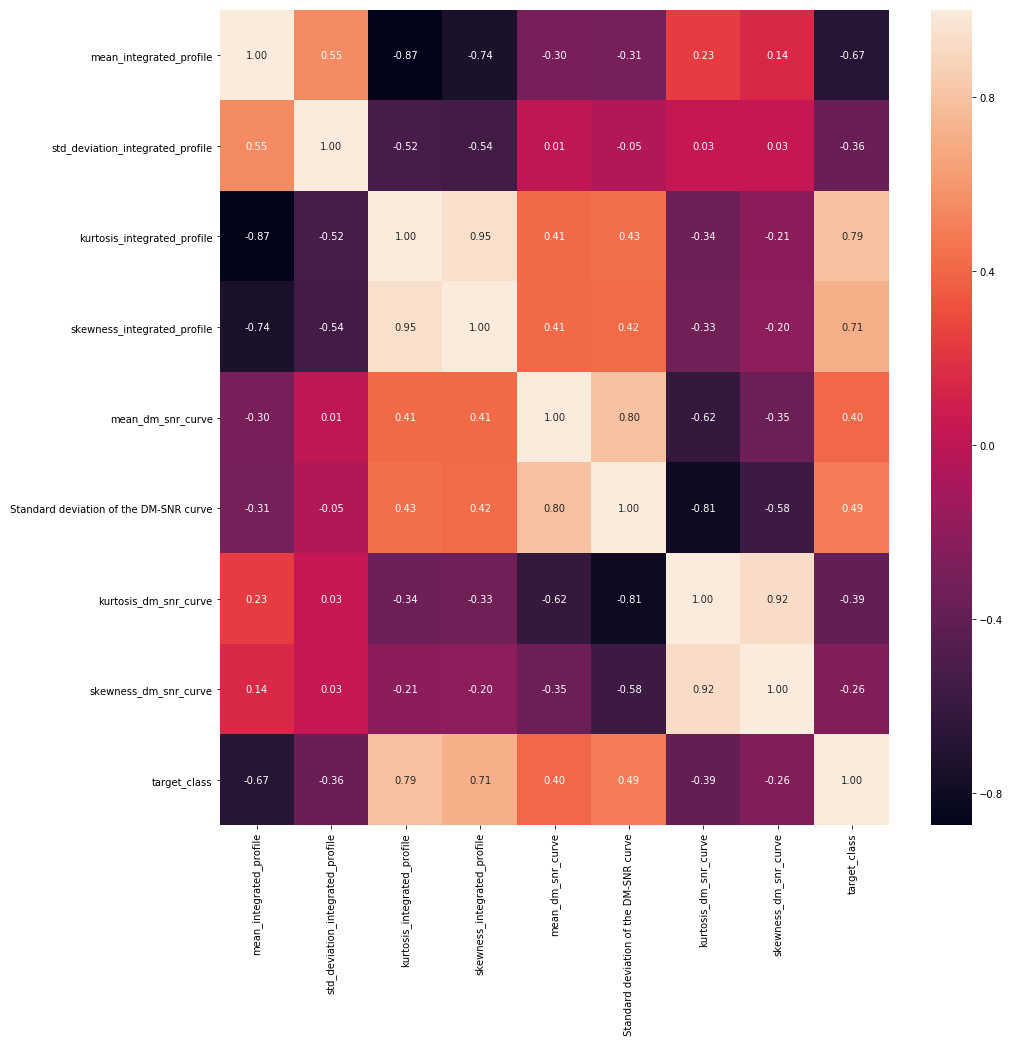

In [18]:
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,linecolor='blue',fmt=".2f",ax=ax)
plt.show()

In [20]:
corr=data.corr()
corr.sort_values(by=["target_class"],ascending=False).iloc[0].sort_values(ascending=False)

target_class                               1.000000
kurtosis_integrated_profile                0.791591
skewness_integrated_profile                0.709528
 Standard deviation of the DM-SNR curve    0.491535
mean_dm_snr_curve                          0.400876
skewness_dm_snr_curve                     -0.259117
std_deviation_integrated_profile          -0.363708
kurtosis_dm_snr_curve                     -0.390816
mean_integrated_profile                   -0.673181
Name: target_class, dtype: float64

**and the following pairplots show correlation between the features with the classes**

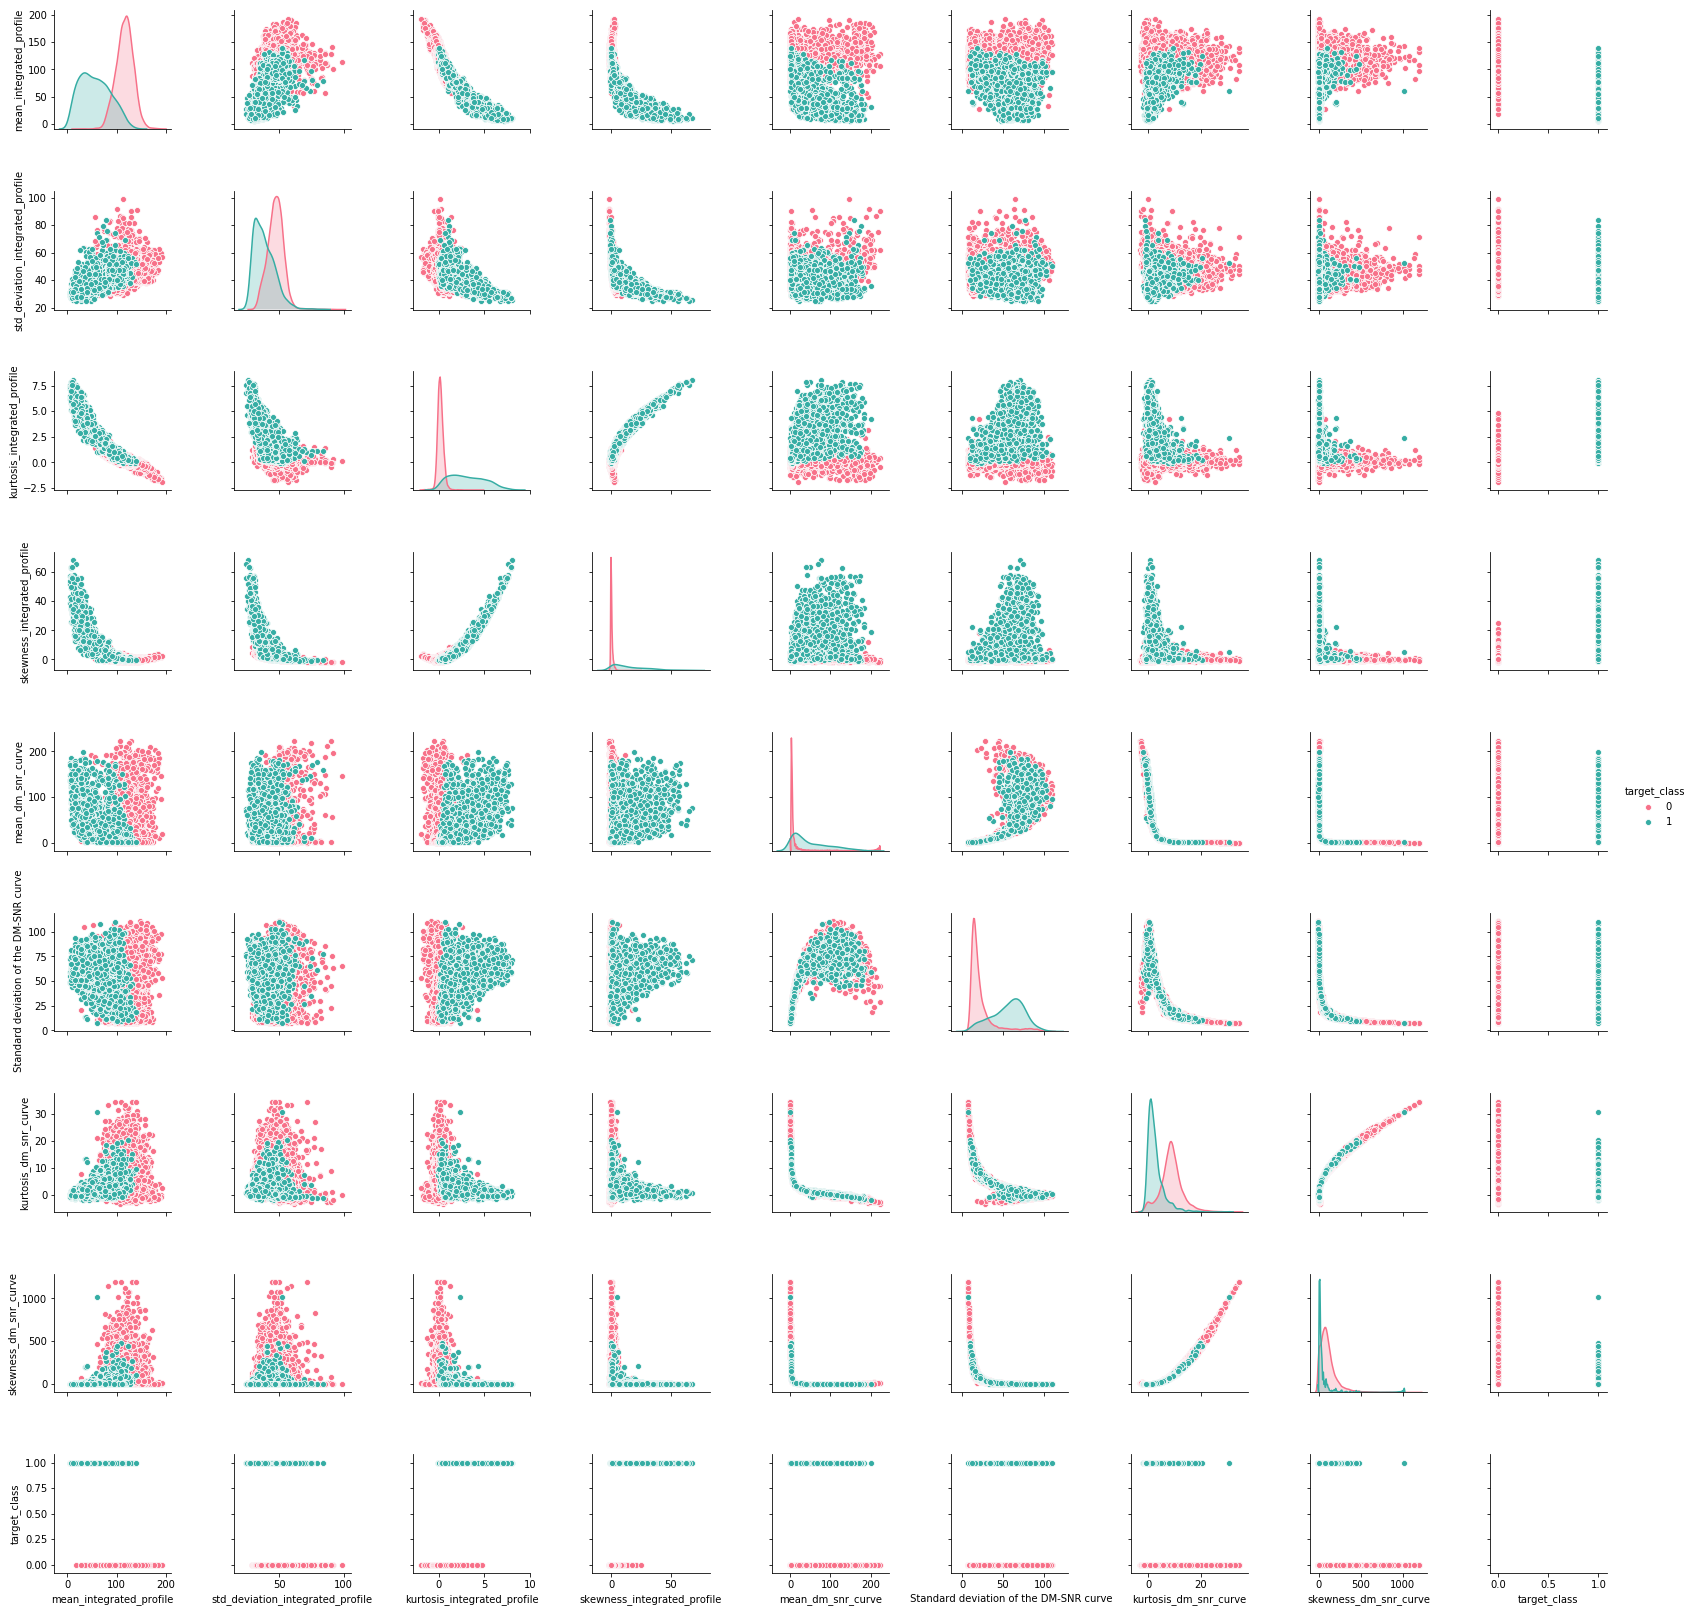

In [22]:
g = sns.pairplot(data, hue="target_class",palette="husl",diag_kind = "kde",kind = "scatter")

In [24]:
y=data["target_class"].values
x_data = data.drop(["target_class"],axis=1)
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state=1)


#  Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_prediction = lr.predict(x_test)

C:\Users\Sashikanth reddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
from sklearn.metrics import mean_squared_error
mse_lr=mean_squared_error(y_test, lr_prediction)

from sklearn.metrics import confusion_matrix,classification_report
cm_lr=confusion_matrix(y_test,lr_prediction)
cm_lr=pd.DataFrame(cm_lr)
cm_lr["total"]=cm_lr[0]+cm_lr[1]
cr_lr=classification_report(y_test,lr_prediction)

In [32]:
from sklearn.metrics import cohen_kappa_score
cks_lr=cohen_kappa_score(y_test, lr_prediction)

In [34]:
score_and_mse={"model":["logistic regression"], "Score":[lr.score(x_test,y_test)],
              "Cohen Kappa Score":[cks_lr],"MSE":[mse_lr]}
score_and_mse=pd.DataFrame(score_and_mse)

#  K-Nearest Neighbour Classification

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10) #n_neighbors = k
knn.fit(x_train,y_train)
knn_prediction = knn.predict(x_test)

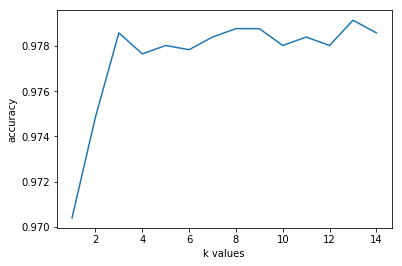

In [38]:
score_list = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [40]:
mse_knn=mean_squared_error(y_test,knn_prediction)
cm_knn=confusion_matrix(y_test,knn_prediction)
cm_knn=pd.DataFrame(cm_knn)
cr_knn=classification_report(y_test,knn_prediction)
cm_knn["total"]=cm_knn[0]+cm_knn[1]

In [42]:
from sklearn.metrics import cohen_kappa_score
cks_knn=cohen_kappa_score(y_test, knn_prediction)

In [44]:
score_and_mse = score_and_mse.append({'model':"knn classification", 'Score':knn.score(x_test,y_test),
                                     "Cohen Kappa Score":cks_knn,"MSE":mse_knn}, ignore_index=True)

# Support Vector Machine Classification

In [46]:
from sklearn.svm import SVC
svm = SVC(random_state=1)
svm.fit(x_train,y_train)
svm_prediction=svm.predict(x_test)

C:\Users\Sashikanth reddy\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [48]:
mse_svm=mean_squared_error(y_test,svm_prediction)
svm_cm=confusion_matrix(y_test,svm_prediction)
cm_svm=pd.DataFrame(svm_cm)
cm_svm["total"]=cm_svm[0]+cm_svm[1]

cr_svm=classification_report(y_test, svm_prediction)
cks_svm = cohen_kappa_score(y_test, svm_prediction)


In [50]:
score_and_mse = score_and_mse.append({'model': "svm classification","Score":svm.score(x_test,y_test),
                                      "Cohen Kappa Score":cks_svm,"MSE":mse_svm}
                                     , ignore_index=True)

#  NAIVE BAYES CLASSIFICATION

In [52]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
prediction_nb=nb.predict(x_test)

In [54]:
nb_mse=mean_squared_error(y_test,prediction_nb)
nb_cm=confusion_matrix(y_test,prediction_nb)
nb_cm=pd.DataFrame(nb_cm)
nb_cm["total"]=nb_cm[0]+nb_cm[1]

cr_nb=classification_report(y_test,prediction_nb)
cks_nb=cohen_kappa_score(y_test, prediction_nb)

score_and_mse = score_and_mse.append({'model': "naive bayes classification","Score":nb.score(x_test,y_test),
                                      "Cohen Kappa Score":cks_nb,"MSE":nb_mse}, ignore_index=True)

#  Decision Tree Classification

In [56]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
prediction_dt=dt.predict(x_test)

In [58]:
dt_mse=mean_squared_error(y_test,prediction_dt)
dt_cm=confusion_matrix(y_test,prediction_dt)
dt_cm=pd.DataFrame(dt_cm)
dt_cm["total"]=dt_cm[0]+dt_cm[1]

cr_dt=classification_report(y_test,prediction_dt)
cks_dt= cohen_kappa_score(y_test, prediction_dt)


In [60]:
score_and_mse = score_and_mse.append({'model': "decision tree classification","Score":dt.score(x_test,y_test),
                                      "Cohen Kappa Score":cks_dt, "MSE":dt_mse}, ignore_index=True)

#  Random Forest Classification

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(x_train,y_train)

prediction_rf=rf.predict(x_test)

In [64]:
rf_mse=mean_squared_error(y_test,prediction_rf)
rf_cm=confusion_matrix(y_test,prediction_rf)
rf_cm=pd.DataFrame(rf_cm)
rf_cm["total"]=rf_cm[0]+rf_cm[1]

cr_rf=classification_report(y_test,prediction_rf)
cks_rf= cohen_kappa_score(y_test, prediction_rf)

In [66]:
score_and_mse = score_and_mse.append({'model': "random forest classification","Score":rf.score(x_test,y_test),
                                      "Cohen Kappa Score":cks_rf,"MSE":rf_mse}, ignore_index=True)

#   Evaluating a classification model

#**Classification Report**

The classification report averages include:

**Precision:** The ratio of total number of correctly positive examples by the total number of predicted postive examples. TP/(TP+FP).

**Recall:** The ratio of total number of correctly classified positive examples divided to the total number of positive examples. TP/TP+FN

**F-measure:** **2RecallPrecision/(Recall+Precision)**

**micro average:** averaging the total true positives, false negative and false positives.

**macro average:** averaging the unweighted mean per label.

**weighted average:** averaging the support-weighted mean per label

In [68]:
print('Classification report for Logistic Regression: \n',cr_lr)
print('Classification report for KNN Classification: \n',cr_knn)
print('Classification report for SVM Classification: \n',cr_svm)
print('Classification report for Naive Bayes Classification: \n',cr_nb)
print('Classification report for Decision Tree Classification: \n',cr_dt)
print('Classification report for Random Forest Classification: \n',cr_rf)

Classification report for Logistic Regression: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      4880
           1       0.94      0.77      0.84       490

   micro avg       0.97      0.97      0.97      5370
   macro avg       0.96      0.88      0.92      5370
weighted avg       0.97      0.97      0.97      5370

Classification report for KNN Classification: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      4880
           1       0.94      0.81      0.87       490

   micro avg       0.98      0.98      0.98      5370
   macro avg       0.96      0.90      0.93      5370
weighted avg       0.98      0.98      0.98      5370

Classification report for SVM Classification: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      4880
           1       0.95      0.74      0.83       490

   micro avg       0.97      0.97    

# Confusion Matrix 

A confusion matrix is a summary of prediction results on a classification problem.

Positive (P) : Observation is positive (for example: is a Pulse Star).

Negative (N) : Observation is not positive (for example: is not a Pulse Star).

True Positive (TP) : Observation is positive, and is predicted to be positive.

False Negative (FN) : Observation is positive, but is predicted negative.

True Negative (TN) : Observation is negative, and is predicted to be negative.

False Positive (FP) : Observation is negative, but is predicted positive.

Text(0.5, 1.0, 'Random Forest Classification')

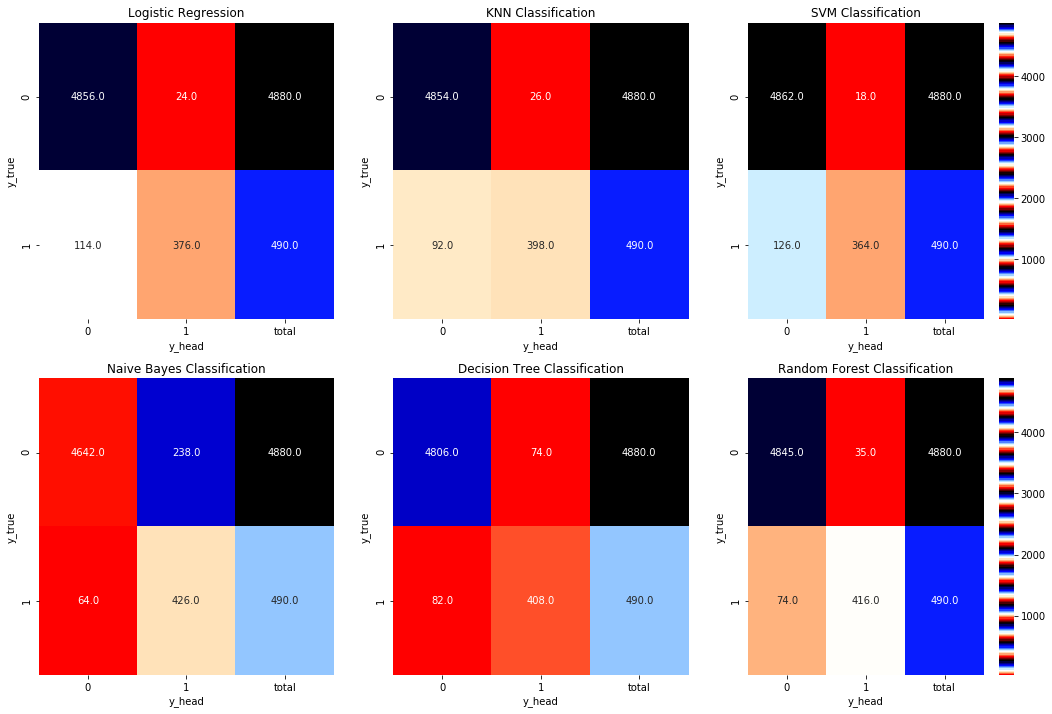

In [70]:
f, axes = plt.subplots(2, 3,figsize=(18,12))
g1 = sns.heatmap(cm_lr,annot=True,fmt=".1f",cmap="flag",cbar=False,ax=axes[0,0])
g1.set_ylabel('y_true')
g1.set_xlabel('y_head')
g1.set_title("Logistic Regression")
g2 = sns.heatmap(cm_knn,annot=True,fmt=".1f",cmap="flag",cbar=False,ax=axes[0,1])
g2.set_ylabel('y_true')
g2.set_xlabel('y_head')
g2.set_title("KNN Classification")
g3 = sns.heatmap(cm_svm,annot=True,fmt=".1f",cmap="flag",ax=axes[0,2])
g3.set_ylabel('y_true')
g3.set_xlabel('y_head')
g3.set_title("SVM Classification")
g4 = sns.heatmap(nb_cm,annot=True,fmt=".1f",cmap="flag",cbar=False,ax=axes[1,0])
g4.set_ylabel('y_true')
g4.set_xlabel('y_head')
g4.set_title("Naive Bayes Classification")
g5 = sns.heatmap(dt_cm,annot=True,fmt=".1f",cmap="flag",cbar=False,ax=axes[1,1])
g5.set_ylabel('y_true')
g5.set_xlabel('y_head')
g5.set_title("Decision Tree Classification")
g6 = sns.heatmap(rf_cm,annot=True,fmt=".1f",cmap="flag",ax=axes[1,2])
g6.set_ylabel('y_true')
g6.set_xlabel('y_head')
g6.set_title("Random Forest Classification")

#  Receiver Operating Characteristic(ROC) Curve

In a ROC curve the true positive rate(Sensitivity) is plotted in function of the false positive rate(100-Specificity) for different cutoff points

Each point on the ROC cure represents a sensitivity/specificity pair corresponding to a particular decision threshold

A test with perfect discrimination(no overlap in the two distributions) has a ROC curve that passes through the upper left corner(100% sensitivity, 100% specificity).

Therefore the closer the ROC curve is to the upper left corner, the higher the overall accuracy of the test



Text(0.5, 1.0, 'Logistic Regression')

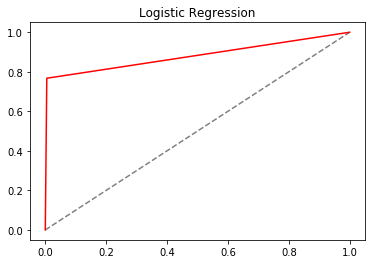

In [72]:
from sklearn.metrics import roc_curve
fpr_lr, tpr_lr, thresholds = roc_curve(y_test, lr_prediction)
plt.plot([0, 1], [0, 1], 'k--',color="grey")
plt.plot(fpr_lr, tpr_lr,color="red")
plt.title('Logistic Regression')

# Accuracy (Score)
It is the ratio of number of correct predictions to the total number of input samples.

Accuracy= Number of Correct Predictions/ Total Number of Predictions Made

# Cohen Kappa Score
Kappa is similar to Accuracy score, but it takes into account the accuracy that would have have happend anyway through random predictions.

It is a measure of how well the classifier actually performs. In other words, if there is a big difference between the accuracy and null error rate, a model will have a higher Kappa score.

Cohen Kappa only serves to make comparisons between two classifiers, if there are more than two classifiers, Fleiss's Kappa is used.

Kappa = (ObservedAccuracy-Expected Accuracy)(1-Expected Accuracy)

# Mean Squared Error(MSE)
Mean Squared Error(MSE) is quite similar to Mean Absolute Error, the only difference being that MSE takes the average of the square of the difference between the original values and predicted values

In [74]:
score_and_mse

,model,Score,Cohen Kappa Score,MSE
0,logistic regression,0.974302,0.831090,0.025698
1,knn classification,0.978026,0.858957,0.021974
2,knn classification,0.978026,0.858957,0.021974
3,svm classification,0.973184,0.820513,0.026816
4,svm classification,0.973184,0.820513,0.026816
5,naive bayes classification,0.943762,0.707598,0.056238
6,naive bayes classification,0.943762,0.707598,0.056238
7,decision tree classification,0.970950,0.823537,0.029050
8,decision tree classification,0.970950,0.823537,0.029050
9,random forest classification,0.979702,0.873063,0.020298
